In [30]:
import scipy.sparse as sp
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [31]:
# Load the processed data
combined_sparse = sp.load_npz('data/combined_sparse.npz')
df_targets = pd.read_csv('data/df_targets.csv')
df_targets['PRIM_CONTRIBUTORY_CAUSE'] = pd.Categorical(df_targets['PRIM_CONTRIBUTORY_CAUSE'])

# Encode the target variable
label_encoder = LabelEncoder()
df_targets_encoded = pd.DataFrame()
df_targets_encoded['PRIM_CONTRIBUTORY_CAUSE_LABEL'] = label_encoder.fit_transform(df_targets['PRIM_CONTRIBUTORY_CAUSE'].cat.codes)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    combined_sparse,
    df_targets_encoded['PRIM_CONTRIBUTORY_CAUSE_LABEL'].values,
    test_size=0.2,
    random_state=42
)

# Convert the sparse matrix to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the XGBoost parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': len(label_encoder.classes_)
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=10)

# Evaluate the model
predictions = model.predict(dtest)
accuracy = (predictions == y_test).mean()
print("Accuracy:", accuracy)


Accuracy: 0.8160851567120048


In [41]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the feature names from the CSV file
feature_names_df = pd.read_csv('data/feature_names.csv')
feature_names = feature_names_df['Feature Name'].tolist()

# Train the XGBoost model (replace with your training code)
model = xgb.train(params, dtrain, num_boost_round=10)

# Get the feature importances from the trained model
importance = model.get_score(importance_type='weight')
importance = {feature_names[int(key[1:])]: value for key, value in importance.items() if key.startswith('f')}

# Sort the feature importances in descending order
sorted_importance = {k: v for k, v in sorted(importance.items(), key=lambda item: item[1], reverse=True)}

# Plot the feature importances
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(range(len(sorted_importance)), list(sorted_importance.values()), align='center')
ax.set_yticks(range(len(sorted_importance)))
ax.set_yticklabels(list(sorted_importance.keys()))
plt.tight_layout()
plt.show()


IndexError: list index out of range

In [40]:
# Get the feature importances from the trained model
importance = model.get_score(importance_type='weight')
importance = {feature_names[int(key.split('_')[1])]: value for key, value in importance.items() if key.startswith('f')}

# Sort the feature importances in descending order
sorted_importance = {k: v for k, v in sorted(importance.items(), key=lambda item: item[1], reverse=True)}

# Plot the feature importances
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(range(len(sorted_importance)), list(sorted_importance.values()), align='center')
ax.set_yticks(range(len(sorted_importance)))
ax.set_yticklabels(list(sorted_importance.keys()))
plt.tight_layout()
plt.show()

IndexError: list index out of range

In [39]:
# Get the feature importances from the trained model
importance = model.get_score(importance_type='weight')
importance = {feature_names[int(key[1:])] if key[0] == 'f' else key: value for key, value in importance.items()}

# Sort the feature importances in descending order
sorted_importance = {k: v for k, v in sorted(importance.items(), key=lambda item: item[1], reverse=True)}

# Plot the feature importances
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(range(len(sorted_importance)), list(sorted_importance.values()), align='center')
ax.set_yticks(range(len(sorted_importance)))
ax.set_yticklabels(list(sorted_importance.keys()))
plt.tight_layout()
plt.show()

IndexError: list index out of range

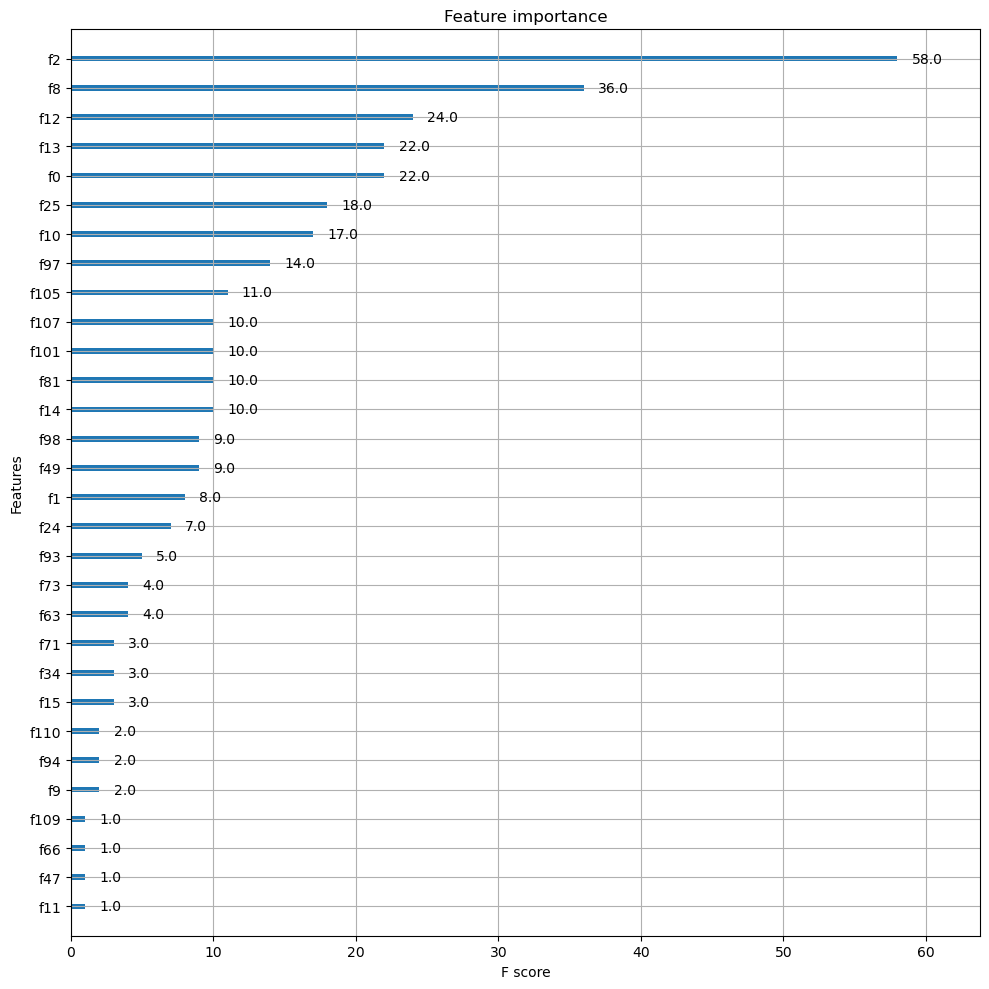

In [38]:
# Plot feature importances for top 30 features
fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(model, ax=ax, max_num_features=30)
plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the feature names from the CSV file
feature_names_df = pd.read_csv('data/feature_names.csv')
feature_names = feature_names_df['Feature Name'].tolist()

# Get feature importances
importance_scores = model.get_score(importance_type='gain')

# Sort the importance scores in descending order
sorted_importance_scores = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)

# Get the top 100 features with non-zero importance scores
top_features = [(feature_names[int(feature[1:])], score) for feature, score in sorted_importance_scores if score > 0][:100]
top_feature_names = [feature for feature, _ in top_features]
top_feature_scores = [score for _, score in top_features]

# Plot feature importances
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(range(len(top_feature_names)), top_feature_scores, align='center')
ax.set_yticks(range(len(top_feature_names)))
ax.set_yticklabels(top_feature_names)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 100 Features by Importance Score')
plt.tight_layout()

plt.show()


IndexError: list index out of range

Text(0.5, 1.0, 'Top 100 Features by Importance Score')

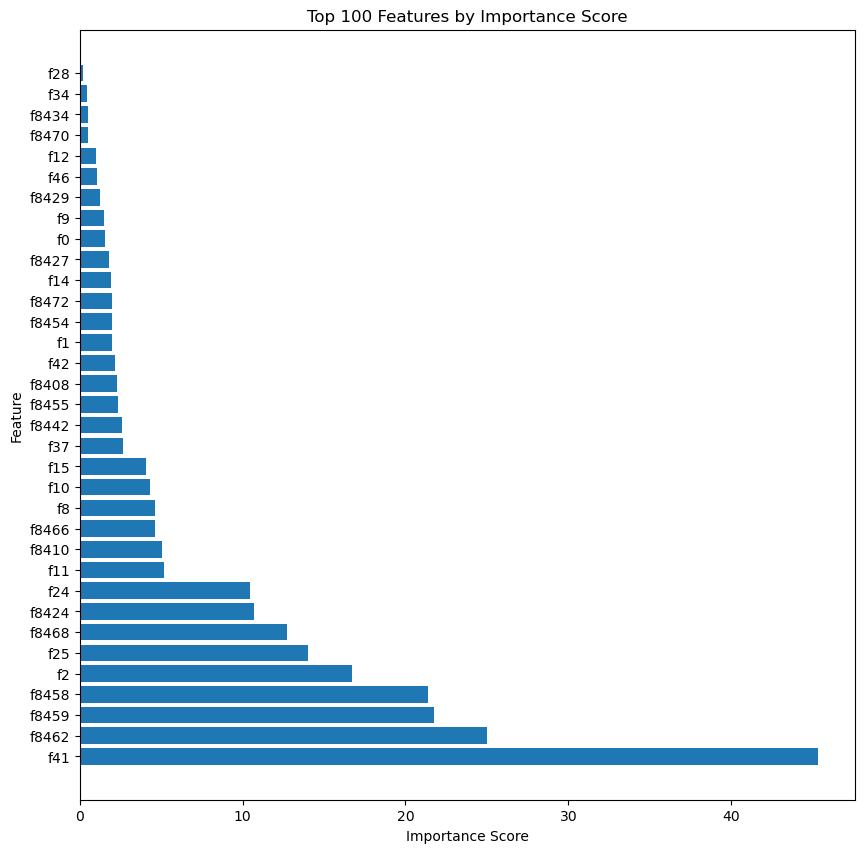

In [ ]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the feature names from the CSV file
feature_names_df = pd.read_csv('data/feature_names.csv')
feature_names = feature_names_df['Feature Name'].tolist()

# Get feature importances
importance_scores = model.get_score(importance_type='gain')

# Sort the importance scores in descending order
sorted_importance_scores = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)

# Get the top 100 features with non-zero importance scores
top_features = [(feature, score) for feature, score in sorted_importance_scores if score > 0][:100]
top_feature_names = [feature for feature, _ in top_features]
top_feature_scores = [score for _, score in top_features]

# Plot feature importances
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(range(len(top_feature_names)), top_feature_scores, align='center')
ax.set_yticks(range(len(top_feature_names)))
ax.set_yticklabels(top_feature_names)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 100 Features by Importance Score')


ValueError: The number of FixedLocator locations (100), usually from a call to set_ticks, does not match the number of labels (97).

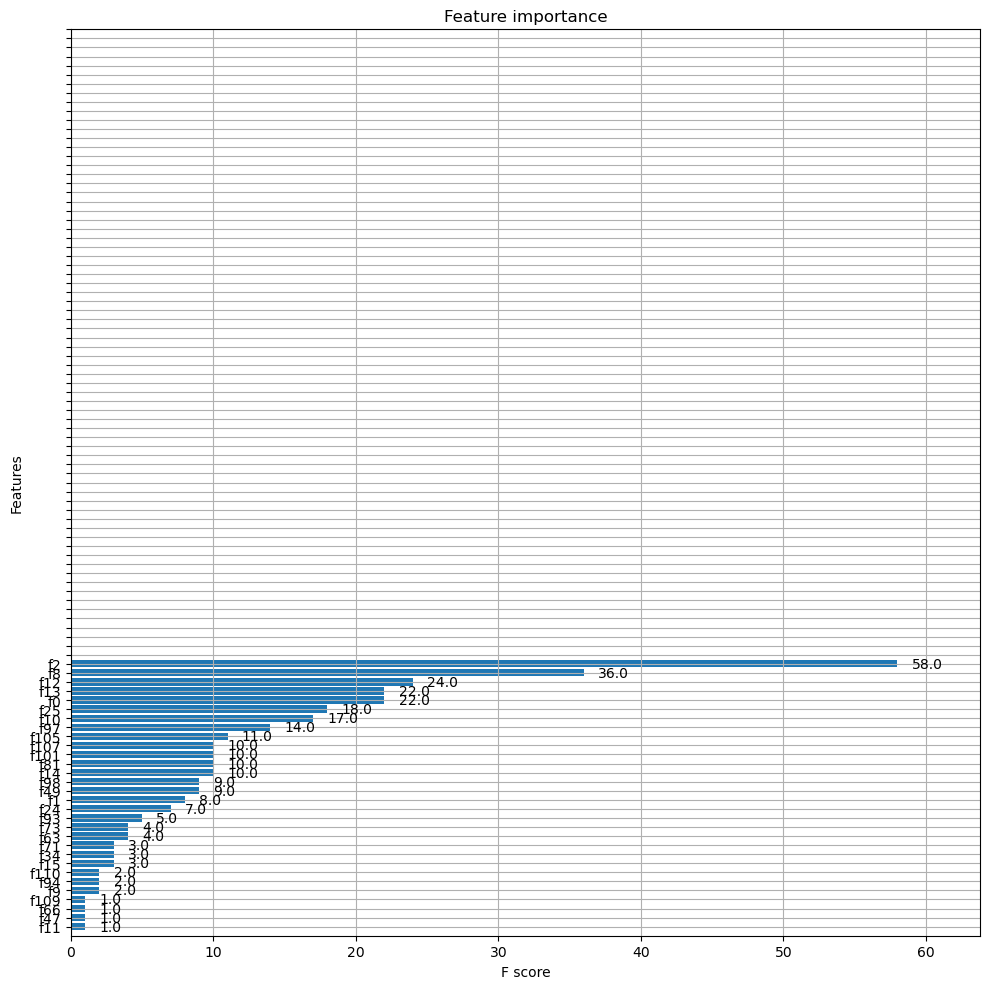

In [33]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the feature names from the CSV file
feature_names_df = pd.read_csv('data/feature_names.csv')
feature_names = feature_names_df['Feature Name'].tolist()

# Plot feature importances
fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(model, max_num_features=100, height=0.8, ax=ax)
plt.tight_layout()  # Adjust spacing

# Customize tick labels
ax.set_yticks(range(100))  # Set tick locations
ax.set_yticklabels(feature_names[:100])  # Set tick labels for top 100 features

plt.show()


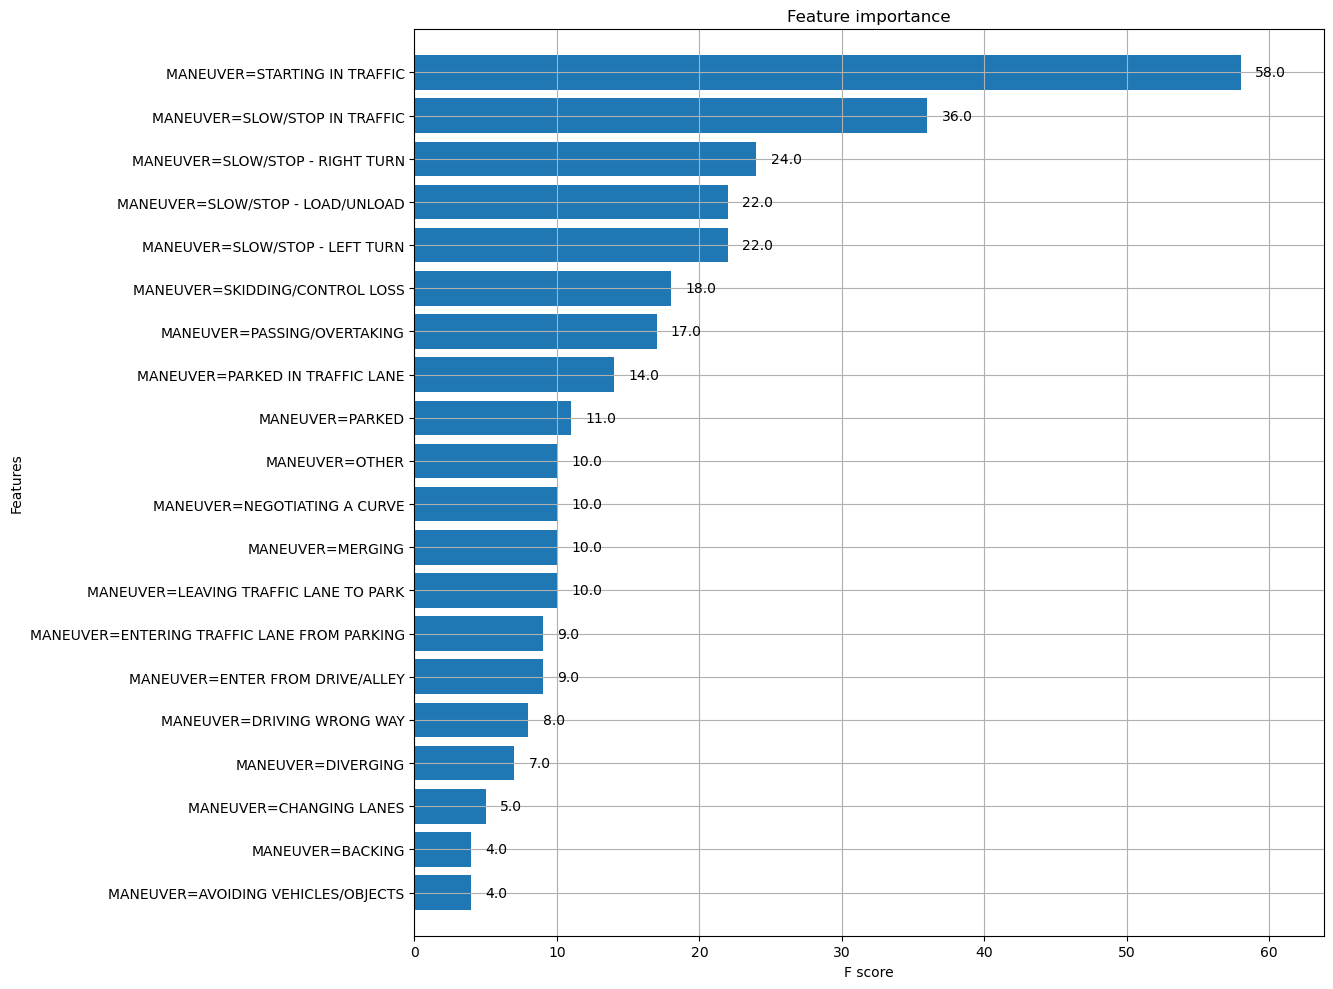

In [44]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the feature names from the CSV file
feature_names_df = pd.read_csv('data/feature_names.csv')
feature_names = feature_names_df['Feature Name'].tolist()

# Plot feature importances
fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(model, max_num_features=20, height=0.8, ax=ax)
plt.tight_layout()  # Adjust spacing

# Customize tick labels
ax.set_yticks(range(20))  # Set tick locations
ax.set_yticklabels(feature_names[:20])  # Set tick labels for top 10 features

plt.show()


In [ ]:
len(feature_names_df)

17001

In [ ]:
X_train.shape

(6762, 17015)

# for the love of god don't run this

In [ ]:
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb

# # Define the parameter grid for grid search
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 500, 1000],
# }

# # Create the XGBoost classifier
# xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_))

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best parameter combination and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Evaluate the best model on the test set
# accuracy = best_model.score(X_test, y_test)
# print("Best Parameters:", best_params)
# print("Best Accuracy:", accuracy)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000}

Best Accuracy: 0.834780551283568

# old models

In [ ]:
# # Load the processed data
# combined_sparse = sp.load_npz('data/combined_sparse.npz')
# df_targets = pd.read_csv('data/df_targets.csv')
# df_targets['PRIM_CONTRIBUTORY_CAUSE'] = pd.Categorical(df_targets['PRIM_CONTRIBUTORY_CAUSE'])

# # Encode the target variable
# label_encoder = LabelEncoder()
# df_targets_encoded = pd.DataFrame()
# df_targets_encoded['PRIM_CONTRIBUTORY_CAUSE_LABEL'] = label_encoder.fit_transform(df_targets['PRIM_CONTRIBUTORY_CAUSE'].cat.codes)

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(
#     combined_sparse,
#     df_targets_encoded['PRIM_CONTRIBUTORY_CAUSE_LABEL'].values,
#     test_size=0.2,
#     random_state=42
# )

# # Convert the sparse matrix to DMatrix format
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)

# # Set the XGBoost parameters
# params = {
#     'learning_rate': 0.1,
#     'max_depth': 7,
#     'n_estimators': 1000,
#     'eta': 0.1,
#     'objective': 'multi:softmax',
#     'num_class': len(label_encoder.classes_)
# }

# # Train the XGBoost model
# model = xgb.train(params, dtrain, num_boost_round=params['n_estimators'])

# # Evaluate the model
# predictions = model.predict(dtest)
# accuracy = (predictions == y_test).mean()
# print("Accuracy:", accuracy)
